## Run this notebook to generate graphs for different models

### Step One: Import environments


In [5]:
from __future__ import absolute_import
from __future__ import print_function

import os
import datetime
from shutil import copyfile

from training_simulation import Simulation
from generator import TrafficGenerator
from memory import Memory
# from model import TrainModel
from visualization import Visualization
from utils import import_train_configuration, set_sumo, set_train_path

### Plot results

In [7]:
# import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 



Baseline: no interference from traci

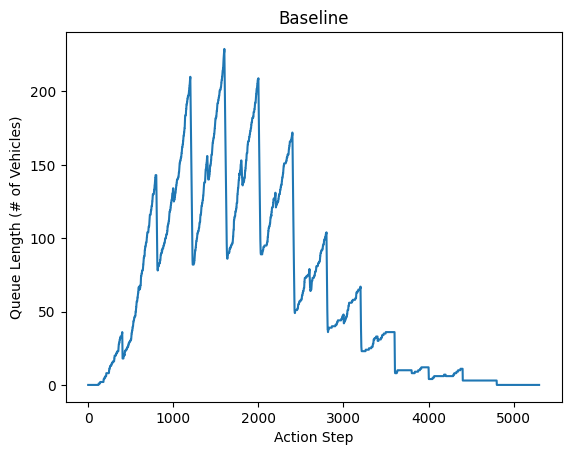

<Figure size 1000x600 with 0 Axes>

In [9]:
queue_length = np.loadtxt('models/baseline/test/plot_queue_data.txt')
queue_length = queue_length[:5300]
plt.plot(queue_length)
plt.title('Baseline')
plt.xlabel('Action Step')
plt.ylabel('Queue Length (# of Vehicles)')
plt.figure(figsize=(10,6))
plt.show()

### RL Model 2: optimize for lowest wait time, trained on presence sensing input

5400


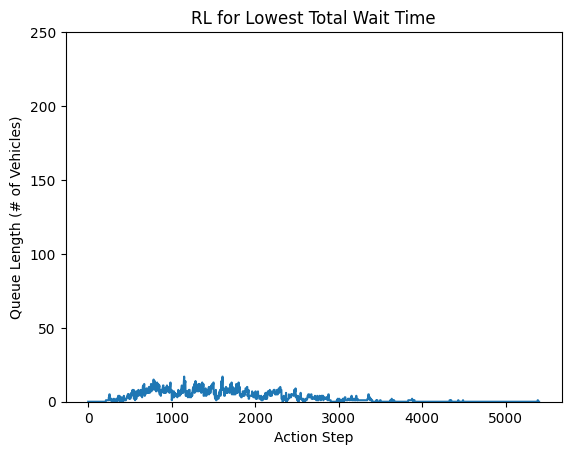

<Figure size 1000x600 with 0 Axes>

In [10]:
queue_length = np.loadtxt('models/train_on_wait_time/test/plot_queue_data.txt')
print(queue_length.size)
plt.plot(queue_length)
plt.title('RL for Lowest Total Wait Time')
plt.xlabel('Action Step')
plt.ylabel('Queue Length (# of Vehicles)')
plt.ylim(0, 250)

plt.figure(figsize=(10,6))
plt.show()

5400


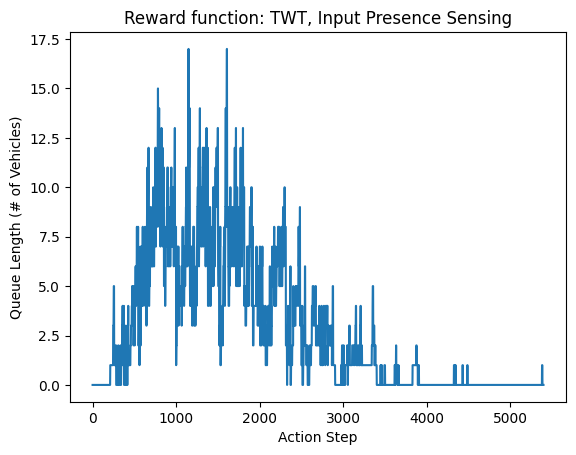

<Figure size 1000x600 with 0 Axes>

In [11]:
queue_length = np.loadtxt('models/train_on_wait_time/test/plot_queue_data.txt')
print(queue_length.size)
plt.plot(queue_length)
plt.title('Reward function: TWT, Input Presence Sensing')
plt.xlabel('Action Step')
plt.ylabel('Queue Length (# of Vehicles)')
plt.figure(figsize=(10,6))
plt.show()

50


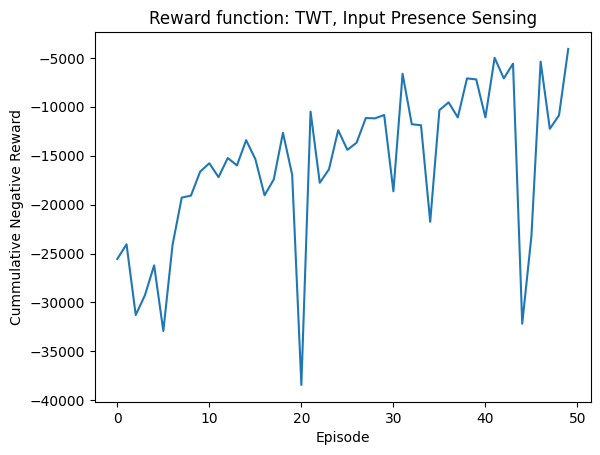

<Figure size 1000x600 with 0 Axes>

In [12]:
queue_length = np.loadtxt('models/train_on_wait_time/plot_reward_data.txt')
print(queue_length.size)
plt.plot(queue_length)
plt.title('Reward function: TWT, Input Presence Sensing')
plt.xlabel('Episode')
plt.ylabel('Cummulative Negative Reward')
plt.figure(figsize=(10,6))
plt.show()

### RL Model 1: Train on presence sensing, optimize for high average speed

5400


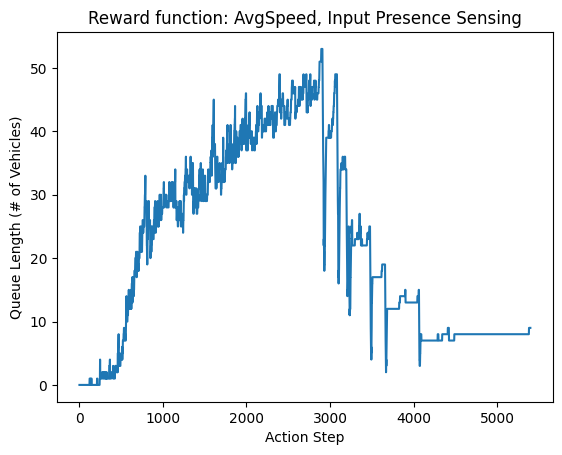

<Figure size 1000x600 with 0 Axes>

In [83]:
queue_length = np.loadtxt('models/model_10/test/plot_queue_data.txt')
print(queue_length.size)
plt.plot(queue_length)
plt.title('Reward function: AvgSpeed, Input Presence Sensing')
plt.xlabel('Action Step')
plt.ylabel('Queue Length (# of Vehicles)')
plt.figure(figsize=(10,6))
plt.show()

50


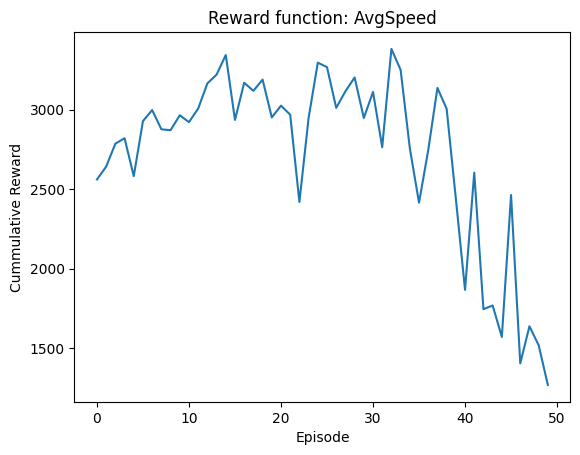

<Figure size 1000x600 with 0 Axes>

In [79]:
queue_length = np.loadtxt('models/model_11/plot_reward_data.txt')
print(queue_length.size)
plt.plot(queue_length)
plt.title('Reward function: AvgSpeed')
plt.xlabel('Episode')
plt.ylabel('Cummulative Reward')
plt.figure(figsize=(10,6))
plt.show()

### Model 3: Counts car in each zone for input, optimized for total wait time

50


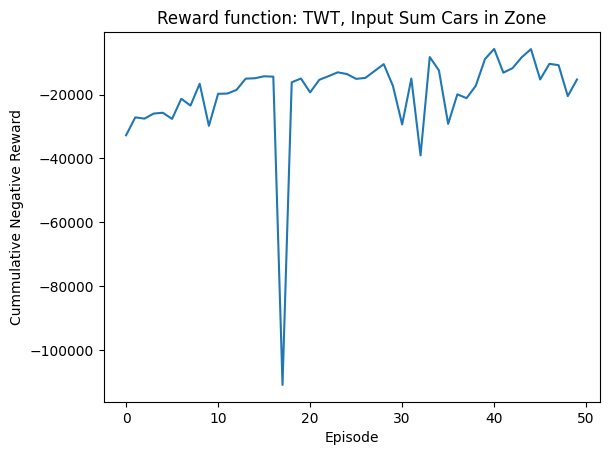

<Figure size 1000x600 with 0 Axes>

In [81]:
queue_length = np.loadtxt('models/model_8/plot_reward_data.txt')
print(queue_length.size)
plt.plot(queue_length)
plt.title('Reward function: TWT, Input Sum Cars in Zone')
plt.xlabel('Episode')
plt.ylabel('Cummulative Negative Reward')
plt.figure(figsize=(10,6))
plt.show()

5400


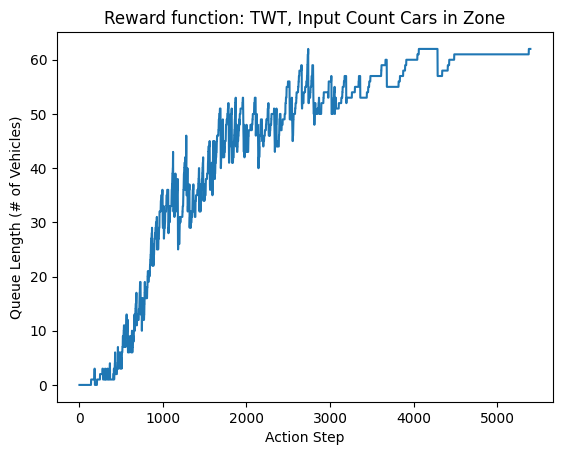

<Figure size 1000x600 with 0 Axes>

In [85]:
queue_length = np.loadtxt('models/model_8/test/plot_queue_data.txt')
print(queue_length.size)
plt.plot(queue_length)
plt.title('Reward function: TWT, Input Count Cars in Zone')
plt.xlabel('Action Step')
plt.ylabel('Queue Length (# of Vehicles)')
plt.figure(figsize=(10,6))
plt.show()

### Graph for traffic generation on test run

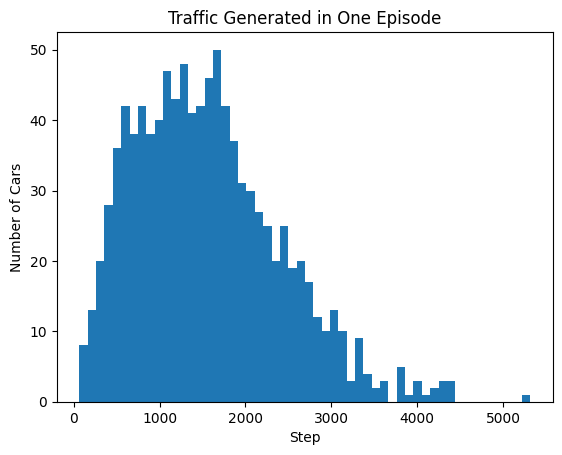

In [72]:
car_dep = np.loadtxt('test_car_departure_time.txt')
car_step = np.zeros(5400)
for i in car_dep:
    # print(int(i))
    car_step[int(i)] += 1

# print(car_step)
plt.hist(car_dep, bins=54)
plt.title('Traffic Generated in One Episode')
plt.xlabel('Step')
plt.ylabel('Number of Cars')
# plt.figure(figsize=(10,6))
plt.show()